This datacamp project is to explore Super Bowl data to identify insights regarding TV viewership, game outcomes, and halftime shows.

The purpose of this projects is to analyze (3) data sets halftime_musicians.csv, super_bowls.csv, and tv.csv to answer the following:

* Has TV vieweship increased over time?
* How many matches finished with a point difference greater than 40?
* Who performed the most songs in Super Bowl halftime shows?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
# Start with super_bowls
super_bowls = pd.read_csv('data/super_bowls.csv')
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [3]:
# Load in the tv
tv = pd.read_csv('data/tv.csv')
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [5]:
# Then halftime_musicians
halftime_musicians = pd.read_csv('data/halftime_musicians.csv')
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


Super Bowl vieweship increaed over time.


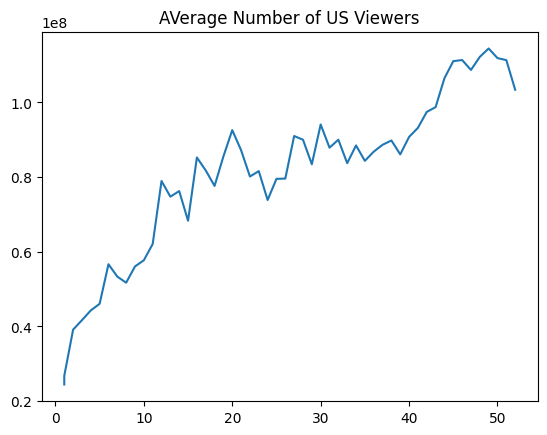

In [6]:
# Find if viewership has increased over time
plt.plot(tv['super_bowl'], tv['avg_us_viewers'])
plt.title('AVerage Number of US Viewers')
viewership_increaed = True
print(f'Super Bowl vieweship increaed over time.')

1


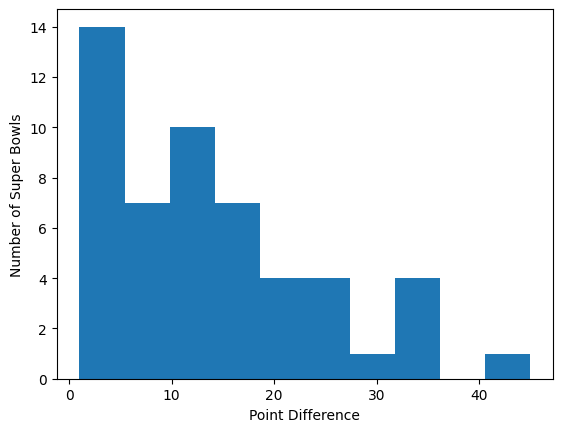

In [9]:
# Filter the super_bowl data to find games with a point difference > 40
difference = len(super_bowls[super_bowls['difference_pts'] > 40])
print(difference)

# Create a plot of the point differences to show the distribution 
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

In [13]:
# Identify who performed the most songs in Super Bowl halftime shows using halftime_musicians
halftime_appearances = halftime_musicians.groupby('musician').sum('num_songs')
halftime_appearances = halftime_appearances.sort_values('num_songs', ascending = False)

print(halftime_appearances)

most_songs = 'Justin Timberlake'

                                                super_bowl  num_songs
musician                                                             
Justin Timberlake                                       90       12.0
Diana Ross                                              30       10.0
Beyoncé                                                 97       10.0
Bruno Mars                                              98        9.0
Grambling State University Tiger Marching Band          79        9.0
...                                                    ...        ...
United States Air Force Academy Cadet Chorale            6        0.0
University of Michigan Marching Band                     7        0.0
Woody Herman                                             7        0.0
University of Texas Longhorn Band                        8        0.0
Up with People                                          60        0.0

[111 rows x 2 columns]
